<a href="https://colab.research.google.com/github/AzlinRusnan/Optimizing_CSAT_Through_Sentiment-Analysis_and_Predictive-Modeling/blob/main/Predictive_Modeling_target_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

file_path = '/content/gdrive/MyDrive/Capstone Project/PM-2.xlsx'
xls = pd.ExcelFile(file_path)

# Check sheet names to understand the structure
xls.sheet_names

# Load the data from the first sheet
df = pd.read_excel(xls, sheet_name='Sheet1')

# Display the first few rows to understand the structure and locate the 'City' column
df.head()

,Number,City,Country,Region,Average Response (calculated),USS Comment,String value,Year,Month-Year,Language,Predicted Sentiment,Confidence
0,INC19299231,Midrand,South Africa,EAME,1,speedy and excellent followup and communicatio...,Very Satisfied,2024,Nov/24,english,LABEL_2,0.928918
1,INC19296281,Guyancourt,France,EAME,1,problem fixed quickly. thank you,Very Satisfied,2024,Nov/24,english,LABEL_2,0.938008
2,INC19300529,Didsbury,United Kingdom,EAME,1,malcolm did a great job in problem solving and...,Very Satisfied,2024,Nov/24,english,LABEL_2,0.930640
3,INC19300258,Bracknell,United Kingdom,EAME,1,thanks for the swift and awesome support and f...,Very Satisfied,2024,Nov/24,english,LABEL_2,0.935296
4,INC19301011,Didsbury,United Kingdom,EAME,1,great support from malcolm as usual,Very Satisfied,2024,Nov/24,english,LABEL_2,0.929943


### **Encoding for Categorical Columns**

1. Use **target Encoding** for city and Country as it suitable for all three models (Random Forest, GBM, and SVR).
3. Use One-hot encoding for Region as Region only contains 4 Region (EAME, APAC, NAFTA and LATAM)

In [3]:
# Perform target encoding for City and Country based on the target variable 'Average Response (calculated)'
city_target_encoding = df.groupby('City')['Average Response (calculated)'].mean()
country_target_encoding = df.groupby('Country')['Average Response (calculated)'].mean()

df['City_Encoded'] = df['City'].map(city_target_encoding)
df['Country_Encoded'] = df['Country'].map(country_target_encoding)


# One-hot encoding for Region
df = pd.get_dummies(df, columns=['Region'], drop_first=True)

one_hot_columns = [col for col in df.columns if col.startswith('Region_')]
df[one_hot_columns] = df[one_hot_columns].astype(int)

df.tail()

,Number,City,Country,Average Response (calculated),USS Comment,String value,Year,Month-Year,Language,Predicted Sentiment,Confidence,City_Encoded,Country_Encoded,Region_EAME,Region_LATAM,Region_NORTH AMERICA
22305,INC7021584,Auangabad,India,2,although didnt resolved as discussed agreed i ...,Satisfied,2022,Jan/2022,english,LABEL_2,0.949234,2.150000,1.247683,0,0,0
22306,INC7187290,Greensboro,United States of America,1,thanks rohit jumping right help us,Very Satisfied,2022,Jan/2022,english,LABEL_2,0.958360,1.347121,1.527866,0,0,1
22307,INC6838845,Pune,India,1,thanks fast action,Very Satisfied,2022,Jan/2022,english,LABEL_2,0.960282,1.247388,1.247683,0,0,0
22308,INC6524346,Unknown,United States of America,5,issue not resolved,Very Dissatisfied,2022,Jan/2022,english,LABEL_0,0.939350,1.801724,1.527866,0,0,1
22309,INC7269810,Kediri,Indonesia,1,fast responses helpful,Very Satisfied,2022,Jan/2022,english,LABEL_2,0.961008,1.097561,1.093985,0,0,0


In [4]:
# Define the target variable (replace 'target_column' with the actual column name)
target = 'Average Response (calculated)'

# Select features related to geographical data only
features = ['City_Encoded', 'Country_Encoded'] + [col for col in df.columns if col.startswith('Region_')]

# Split the data into X (features) and y (target)
X = df[features]
y = df[target]


In [5]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Train and Test Models
#Train and evaluate the models: Random Forest, SVR, and GBM.

#1. Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R2 Score:", r2_rf)

Random Forest:
MSE: 1.0151025173155312
RMSE: 1.007522961185268
MAE: 0.698941474877691
R2 Score: 0.03999948305875245


In [7]:
# Support Vector Regression (SVR)
# SVR requires feature scaling for optimal performance.

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svr = svr.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_svr)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_svr)
r2_rf = r2_score(y_test, y_pred_svr)

print("SVR:")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R2 Score:", r2_rf)

Random Forest:
MSE: 1.1692658718195337
RMSE: 1.0813259785187508
MAE: 0.523714649122415
R2 Score: -0.1057955450223731


In [8]:
# Gradient Boosting Machine (GBM)

from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gbm = GradientBoostingRegressor(random_state=42)
gbm.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_gbm)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_gbm)
r2_rf = r2_score(y_test, y_pred_gbm)

print("GBM:")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R2 Score:", r2_rf)

GBM:
MSE: 1.0069195928335695
RMSE: 1.0034538319392525
MAE: 0.697839294931874
R2 Score: 0.04773822037717501


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the hyperparameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)
rf_random_search.fit(X_train, y_train)
print("Best Hyperparameters (RandomizedSearchCV):", rf_random_search.best_params_)
print("Best RMSE (RandomizedSearchCV):", (-rf_random_search.best_score_)**0.5)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters (RandomizedSearchCV): {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
Best RMSE (RandomizedSearchCV): 1.0460806938809408


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid for GBM
gbm_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize the GBM model
gbm = GradientBoostingRegressor(random_state=42)

# Use RandomizedSearchCV for hyperparameter tuning
gbm_random_search = RandomizedSearchCV(
    estimator=gbm,
    param_distributions=gbm_param_grid,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use MSE as the scoring metric
    n_jobs=-1,  # Use all available cores
    verbose=2,  # Verbosity for progress
    random_state=42  # For reproducibility
)

# Fit the RandomizedSearchCV
gbm_random_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Hyperparameters (RandomizedSearchCV):", gbm_random_search.best_params_)
print("Best RMSE (RandomizedSearchCV):", (-gbm_random_search.best_score_)**0.5)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters (RandomizedSearchCV): {'subsample': 1.0, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.05}
Best RMSE (RandomizedSearchCV): 1.0394725496170225


1) Since baseline RMSE provide better reading than hyperparameter for RF and GBM, we use baseline only.

2) Baseline GBM perform better.

3) I choose Random Forest as RF tends to be simpler and computationally faster, especially for larger datasets.

**Next Steps for Predictive Modeling**

In [12]:
#1. Refit the Random Forest Model
#Train the Random Forest model on the entire training dataset.

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:
# 2. Make Predictions
# Use the trained model to make predictions on both the training and test datasets:

# Predictions on training data
y_train_pred = rf.predict(X_train)

# Predictions on test data
y_test_pred = rf.predict(X_test)


In [14]:
# 3. Evaluate the Model
# Assess model performance using metrics like RMSE, MAE, and R² on both datasets:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Training evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)
print("Training R2:", train_r2)

# Test evaluation
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test R2:", test_r2)


Training RMSE: 1.0337899661350591
Training MAE: 0.7109736108480951
Training R2: 0.0664244344400079
Test RMSE: 1.007522961185268
Test MAE: 0.698941474877691
Test R2: 0.03999948305875245


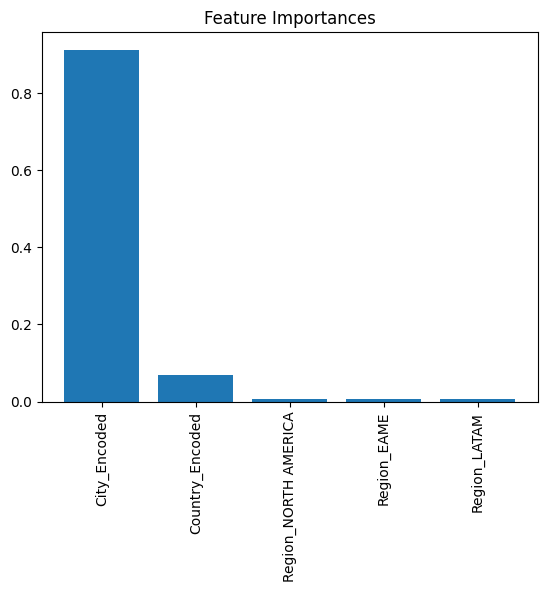

In [15]:
#4. Feature Importance
# Identify the most important features contributing to the predictions:

import matplotlib.pyplot as plt

feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), [X_train.columns[i] for i in sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the hyperparameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Use GridSearchCV or RandomizedSearchCV for hyperparameter tuning
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Hyperparameters for Random Forest:", rf_grid_search.best_params_)
print("Best RMSE (Random Forest):", (-rf_grid_search.best_score_)**0.5)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best RMSE (Random Forest): 1.0533430917332722


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameter grid
gbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize the model
gbm = GradientBoostingRegressor(random_state=42)

# Use GridSearchCV or RandomizedSearchCV for hyperparameter tuning
gbm_grid_search = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
gbm_grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Hyperparameters for GBM:", gbm_grid_search.best_params_)
print("Best RMSE (GBM):", (-gbm_grid_search.best_score_)**0.5)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Hyperparameters for GBM: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.6}
Best RMSE (GBM): 1.0532934435424615
